<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/ML-notebooks/Linear_regression_sklearn_II_(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

# Notebook aim:

This notebook dont have the aim of make the "perfect" job only ilustrate the workflow!!!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Median house value in $100,000s
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


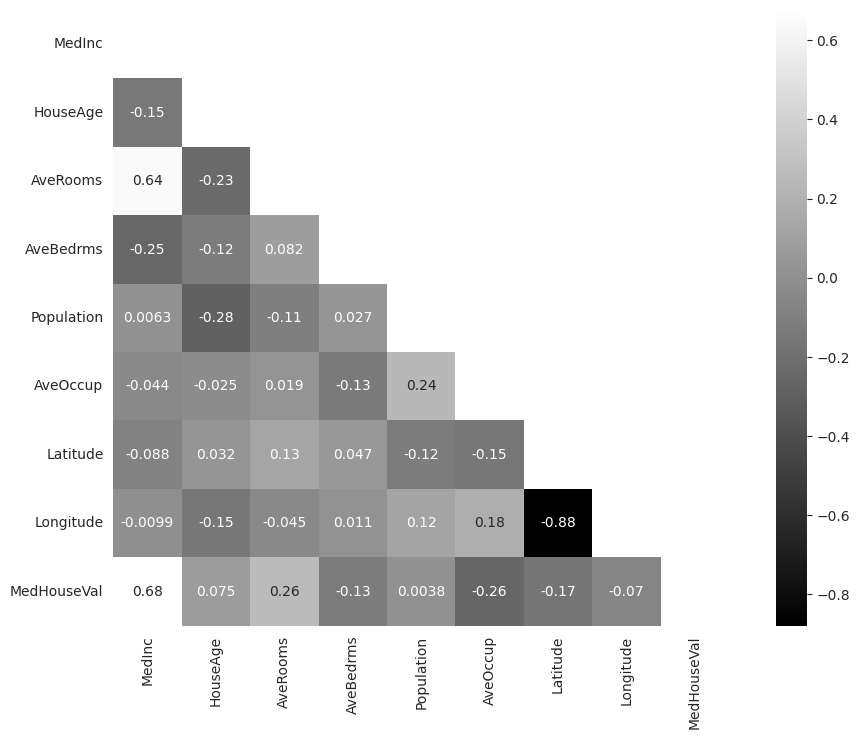

In [ ]:
corrMatrix = df.corr(method='spearman')
import numpy as np
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True, annot=True, cmap="gray")

In [ ]:
# What variables are important?
from sklearn.preprocessing import StandardScaler

In [ ]:
# Multivariate
target = 'MedHouseVal'
model = LinearRegression()
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.5558915986952444


In [ ]:
# Include regularization
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
# Ridge Regression (L2)
ridge = Ridge(alpha=500)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(mean_squared_error(y_test, y_pred_ridge))

0.5441969037184541


In [ ]:
# Lasso Regression (L1)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print(mean_squared_error(y_test, y_pred_lasso))

0.5444491581246519


In [ ]:
feature_names = X.columns
# Create a DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear': model.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
coef_df

,Feature,Linear,Ridge,Lasso
0,MedInc,0.448675,0.448511,3.842888e-01
1,HouseAge,0.009724,0.009726,1.082531e-02
2,AveRooms,-0.123323,-0.123014,0.000000e+00
3,AveBedrms,0.783145,0.781417,7.456602e-02
4,Population,-0.000002,-0.000002,7.675149e-07
5,AveOccup,-0.003526,-0.003526,-3.251621e-03
6,Latitude,-0.419792,-0.419787,-3.838424e-01
7,Longitude,-0.433708,-0.433681,-3.869609e-01


# Lasso
lasso can act as feature selector.